In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

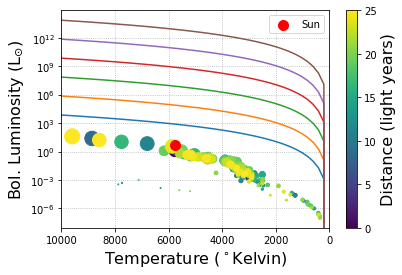

In [12]:
widths = [28, 12, 11, 8, 8,
          9, 9, 10, 10, 9,
          5, 11, 6, 9, 14,
          10, 7, 6, 8, 7,
          8, 9, 9, 9, 6]
df = pd.read_fwf('../data/nearest-stars', widths=widths)
df = df.drop([0, 1])

# Convert to number from string.
columns = ['Teff', 'Mv', 'DIST', 'RADIUS', 'BOL-LUM']
for col in columns:
    df[col] = df[col].str.replace(r'[a-zA-Z]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Radius conversion from Sun, Jupiter, and Earth.
w = df['Unnamed: 19'] == 'Rj'
df.loc[w, 'RADIUS'] /= 9.9604
w = df['Unnamed: 19'] == 'Re'
df.loc[w, 'RADIUS'] /= 109.18

# Temperature-Luminosity Relation
teff = np.linspace(0, 1e4)
lsun = 4 * np.pi * (5.67e-8) * pow(teff, 4)
for rsun in [0.001, 0.01, 0.1, 1, 10, 100]:
    plt.plot(teff, lsun * pow(rsun, 2),)

# Plot
plt.scatter(df['Teff'], df['BOL-LUM'], s=100*df['RADIUS'], c=df['DIST'], cmap='viridis', zorder=2)
plt.scatter(5778, 4.85, s=100, c='red', label='Sun', zorder=3)
plt.xlabel(r'Temperature ($^\circ$Kelvin)', size=16)
plt.ylabel(r'Bol. Luminosity (L$_{\odot}$)', size=16)

#
plt.grid(zorder=3, ls=':')
plt.legend()
plt.xlim(10000, 0)
plt.yscale('log')
plt.colorbar().set_label(label='Distance (light years)', size=16)
plt.clim(df.DIST.min(), 25)